In [1]:
import pandas as pd
import re
import nltk
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import all_estimators  # Import all_estimators module to get a list of classifiers
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SSC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SSC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.read_csv('C:/Users/SSC/OneDrive/Desktop/Task 2/dataset.csv')

In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
df = df[['label', 'tweet']]

In [10]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [11]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'http.*', '', text)
    text = re.sub(r'ð\w+', '', text)
    text = re.sub(r'ð\s+', '', text)
    text = re.sub(r'\sð\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT\s@\w+:', '', text)
    text = re.sub(r'@\w+:', '', text)

    return text.lower()

In [12]:
df['cleaned_text'] = df['tweet'].apply(clean_text)

In [13]:
df[['cleaned_text']].head(20)

,cleaned_text
0,when a father is dysfunctional and is so sel...
1,thanks for lyft credit i cant use cause they...
2,bihday your majesty
3,model i love u take with u all the time in ur
4,factsguide society now motivation
5,22 huge fan fare and big talking before they l...
6,camping tomorrow dannyâ
7,the next school year is the year for examscant...
8,we won love the land allin cavs champions clev...
9,welcome here im its so gr8


In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join the tokens back into a sentence

In [16]:
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

In [17]:
stemmer = PorterStemmer()

In [18]:
def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

In [19]:
df['stemmed_tokens'] = df['tokenized_text'].apply(stem_text)

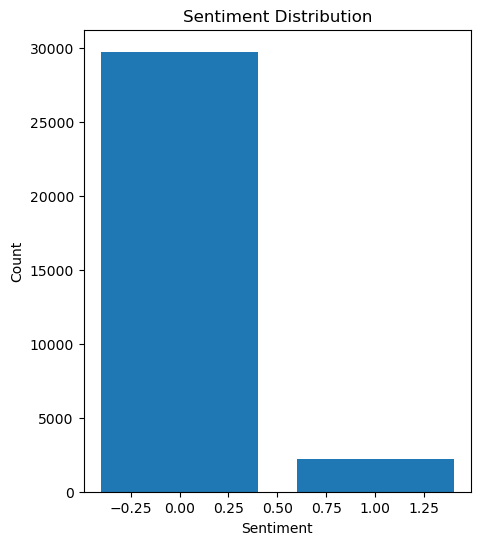

In [20]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(5, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

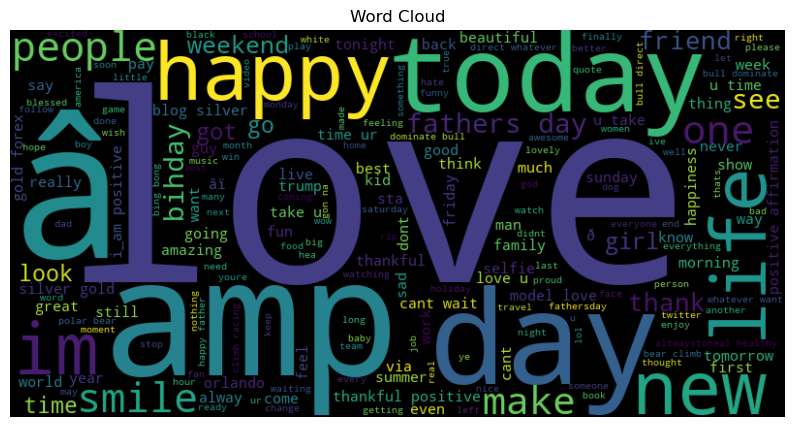

In [21]:
all_text = ' '.join(df['tokenized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [22]:
word_freq = Counter(all_text.split())
common_words = word_freq.most_common(20)  # Get the 20 most common words
print('Top 20 Most Common Words:')
for word, freq in common_words:
    print(f'{word}: {freq}')

Top 20 Most Common Words:
love: 2646
day: 2221
â: 1880
happy: 1667
amp: 1584
im: 1138
u: 1137
time: 1118
life: 1090
like: 1042
today: 992
new: 983
positive: 928
get: 918
thankful: 917
people: 852
good: 840
bihday: 832
cant: 799
one: 781


In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenized_text'])

In [24]:
X = tfidf_matrix
y = df['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
for name, ClassifierClass in all_estimators(type_filter='classifier'):
    try:
        # Initialize the classifier
        classifier = ClassifierClass()

        # Train the classifier
        classifier.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = classifier.predict(X_test)

        # Evaluate the classifier's performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Print the evaluation metrics and classifier name
        print(f'Classifier: {name}')
        print(f'Accuracy: {accuracy * 100 :.2f} %')
        print(f'Precision: {precision * 100:.2f} %')
        print(f'Recall: {recall * 100:.2f} %')
        print(f'F1-score: {f1 * 100:.2f} %')

        # Save the trained model to a file
        model_filename = f'{name}_sentiment_model.joblib'
        joblib.dump(classifier, model_filename)
        print(f'Saved model as {model_filename}')
        print('-------------------')

    except Exception as e:
        # Handle exceptions that may occur when initializing or training a specific classifier
        print(f'Error with {name}: {str(e)}')
        print('-------------------')

Classifier: AdaBoostClassifier
Accuracy: 94.37 %
Precision: 93.60 %
Recall: 94.37 %
F1-score: 93.19 %
Saved model as AdaBoostClassifier_sentiment_model.joblib
-------------------
Classifier: BaggingClassifier
Accuracy: 94.68 %
Precision: 93.97 %
Recall: 94.68 %
F1-score: 94.03 %
Saved model as BaggingClassifier_sentiment_model.joblib
-------------------
Classifier: BernoulliNB
Accuracy: 93.71 %
Precision: 93.25 %
Recall: 93.71 %
F1-score: 93.45 %
Saved model as BernoulliNB_sentiment_model.joblib
-------------------
Classifier: CalibratedClassifierCV
Accuracy: 94.79 %
Precision: 94.19 %
Recall: 94.79 %
F1-score: 93.86 %
Saved model as CalibratedClassifierCV_sentiment_model.joblib
-------------------
Error with CategoricalNB: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
-------------------
Error with ClassifierChain: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
-------------------
Classifier: 